Greyscale ℓ2-TV Denoising
=========================

This example demonstrates the use of class [tvl2.TVL2Denoise](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl2.html#sporco.admm.tvl2.TVL2Denoise) for removing Gaussian white noise from a greyscale image using Total Variation regularization with an ℓ2 data fidelity term (ℓ2-TV denoising).

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted by Gaussian white noise with a 0.05 standard deviation.

In [3]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.05, img.shape)

Set regularization parameter and options for ℓ2-TV denoising solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 0.04
opt = tvl2.TVL2Denoise.Options({'Verbose': True, 'MaxMainIter': 200,
                'gEvalY': False, 'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl2.TVL2Denoise(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------


   0  7.79e+02  7.44e+01  1.76e+04  6.83e-01  4.28e-01  1.80e-01
   1  6.19e+02  2.26e+02  9.84e+03  3.01e-01  1.38e-01  1.80e-01


   2  6.02e+02  2.54e+02  8.70e+03  1.77e-01  1.03e-01  2.65e-01
   3  5.89e+02  2.66e+02  8.07e+03  1.10e-01  7.26e-02  3.48e-01


   4  5.83e+02  2.67e+02  7.91e+03  7.49e-02  5.63e-02  4.29e-01
   5  5.80e+02  2.67e+02  7.80e+03  5.32e-02  4.42e-02  4.95e-01


   6  5.78e+02  2.67e+02  7.76e+03  3.92e-02  3.42e-02  5.43e-01
   7  5.76e+02  2.68e+02  7.71e+03  2.98e-02  2.56e-02  5.43e-01


   8  5.75e+02  2.68e+02  7.69e+03  2.32e-02  1.88e-02  5.43e-01
   9  5.74e+02  2.68e+02  7.67e+03  1.84e-02  1.53e-02  6.04e-01


  10  5.74e+02  2.68e+02  7.66e+03  1.49e-02  1.36e-02  6.63e-01
  11  5.74e+02  2.67e+02  7.65e+03  1.22e-02  1.15e-02  6.63e-01


  12  5.73e+02  2.67e+02  7.65e+03  1.01e-02  9.24e-03  6.63e-01
  13  5.73e+02  2.67e+02  7.65e+03  8.45e-03  7.48e-03  6.63e-01


  14  5.73e+02  2.67e+02  7.64e+03  7.20e-03  6.24e-03  6.63e-01
  15  5.73e+02  2.67e+02  7.64e+03  6.22e-03  5.18e-03  6.63e-01


  16  5.73e+02  2.67e+02  7.64e+03  5.44e-03  4.37e-03  6.63e-01
  17  5.73e+02  2.67e+02  7.64e+03  4.78e-03  4.00e-03  7.39e-01


  18  5.72e+02  2.67e+02  7.64e+03  4.26e-03  3.74e-03  7.39e-01
  19  5.72e+02  2.67e+02  7.64e+03  3.81e-03  3.29e-03  7.39e-01


  20  5.72e+02  2.67e+02  7.64e+03  3.43e-03  2.90e-03  7.39e-01
  21  5.72e+02  2.67e+02  7.64e+03  3.11e-03  2.56e-03  7.39e-01


  22  5.72e+02  2.67e+02  7.63e+03  2.82e-03  2.37e-03  8.14e-01
  23  5.72e+02  2.67e+02  7.63e+03  2.58e-03  2.30e-03  8.14e-01


  24  5.72e+02  2.67e+02  7.63e+03  2.37e-03  2.09e-03  8.14e-01
  25  5.72e+02  2.67e+02  7.63e+03  2.18e-03  1.88e-03  8.14e-01


  26  5.72e+02  2.67e+02  7.63e+03  2.01e-03  1.68e-03  8.14e-01
  27  5.72e+02  2.67e+02  7.63e+03  1.87e-03  1.54e-03  8.14e-01


  28  5.72e+02  2.67e+02  7.63e+03  1.73e-03  1.46e-03  8.95e-01
  29  5.72e+02  2.67e+02  7.63e+03  1.61e-03  1.43e-03  8.95e-01


  30  5.72e+02  2.67e+02  7.63e+03  1.50e-03  1.33e-03  8.95e-01
  31  5.72e+02  2.67e+02  7.63e+03  1.40e-03  1.23e-03  8.95e-01


  32  5.72e+02  2.67e+02  7.63e+03  1.31e-03  1.14e-03  8.95e-01
  33  5.72e+02  2.67e+02  7.63e+03  1.23e-03  1.03e-03  8.95e-01


  34  5.72e+02  2.67e+02  7.63e+03  1.16e-03  9.33e-04  8.95e-01
  35  5.72e+02  2.67e+02  7.63e+03  1.09e-03  9.11e-04  9.96e-01


  36  5.72e+02  2.67e+02  7.63e+03  1.02e-03  9.22e-04  9.96e-01
  37  5.72e+02  2.67e+02  7.63e+03  9.65e-04  8.49e-04  9.96e-01
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL2Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Denoise solve time:  4.34 s
Noisy image PSNR:    25.04 dB
Denoised image PSNR: 32.48 dB


Display reference, corrupted, and denoised images.

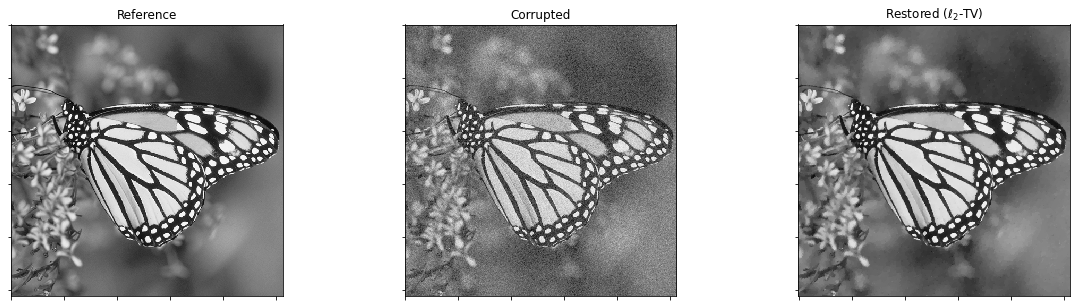

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_2$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

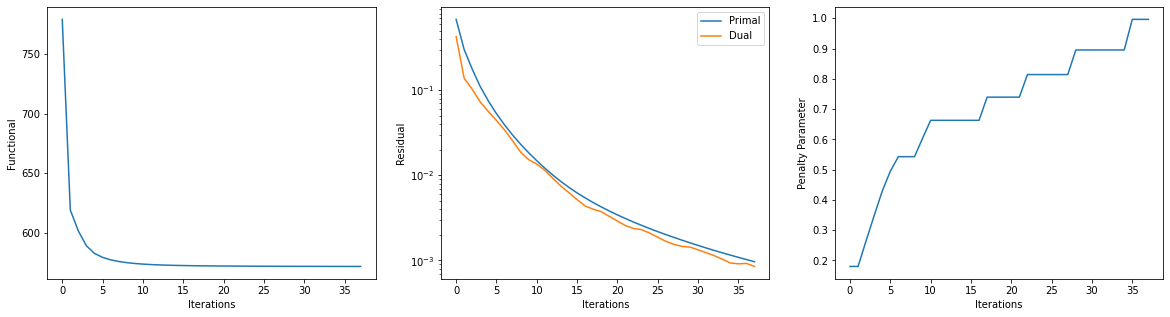

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['Primal', 'Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()